In [1]:
import pandas as pd
from mlxtend.preprocessing import TransactionEncoder
from mlxtend.frequent_patterns import apriori
import numpy as np

In [2]:
data = pd.read_csv("dataset_group.csv", header = None, sep=',')
data.head()

,0,1,2
0,2000-01-01,1,yogurt
1,2000-01-01,1,pork
2,2000-01-01,1,sandwich bags
3,2000-01-01,1,lunch meat
4,2000-01-01,1,all- purpose


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22343 entries, 0 to 22342
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   0       22343 non-null  object
 1   1       22343 non-null  int64 
 2   2       22343 non-null  object
dtypes: int64(1), object(2)
memory usage: 523.8+ KB


In [4]:
df = data.iloc[:,1:3]
df.head()

,1,2
0,1,yogurt
1,1,pork
2,1,sandwich bags
3,1,lunch meat
4,1,all- purpose


In [5]:
dataset = df.groupby(1)[2].apply(list)
dataset[1]

['yogurt',
 'pork',
 'sandwich bags',
 'lunch meat',
 'all- purpose',
 'flour',
 'soda',
 'butter',
 'vegetables',
 'beef',
 'aluminum foil',
 'all- purpose',
 'dinner rolls',
 'shampoo',
 'all- purpose',
 'mixes',
 'soap',
 'laundry detergent',
 'ice cream',
 'dinner rolls']

In [7]:
te = TransactionEncoder()
te_ary = te.fit(dataset).transform(dataset)
df = pd.DataFrame(te_ary, columns=te.columns_)
df.shape

(1139, 38)

In [8]:
df.head()

,all- purpose,aluminum foil,bagels,beef,butter,cereals,cheeses,coffee/tea,dinner rolls,dishwashing liquid/detergent,...,shampoo,soap,soda,spaghetti sauce,sugar,toilet paper,tortillas,vegetables,waffles,yogurt
0,True,True,False,True,True,False,False,False,True,False,...,True,True,True,False,False,False,False,True,False,True
1,False,True,False,False,False,True,True,False,False,True,...,True,False,False,False,False,True,True,True,True,True
2,False,False,True,False,False,True,True,False,True,False,...,True,True,True,True,False,True,False,True,False,False
3,True,False,False,False,False,True,False,False,False,False,...,False,False,True,False,False,True,False,False,False,False
4,True,False,False,False,False,False,False,False,True,False,...,False,False,True,True,False,True,True,True,True,True


In [9]:
#kiem tra du lieu null
df.isnull().any()

all- purpose                    False
aluminum foil                   False
bagels                          False
beef                            False
butter                          False
cereals                         False
cheeses                         False
coffee/tea                      False
dinner rolls                    False
dishwashing liquid/detergent    False
eggs                            False
flour                           False
fruits                          False
hand soap                       False
ice cream                       False
individual meals                False
juice                           False
ketchup                         False
laundry detergent               False
lunch meat                      False
milk                            False
mixes                           False
paper towels                    False
pasta                           False
pork                            False
poultry                         False
sandwich bag

In [13]:
frequent_itemsets = apriori(df, min_support=0.03, use_colnames=True)
frequent_itemsets.head()

,support,itemsets
0,0.374890,(all- purpose)
1,0.384548,(aluminum foil)
2,0.385426,(bagels)
3,0.374890,(beef)
4,0.367867,(butter)


In [17]:
from mlxtend.frequent_patterns import association_rules
rules = association_rules(frequent_itemsets, metric = "lift", min_threshold=1.8)
rules

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
0,"(fruits, juice)","(bagels, all- purpose)",0.136084,0.150132,0.036874,0.270968,1.804867,0.016444,1.165749
1,"(bagels, all- purpose)","(fruits, juice)",0.150132,0.136084,0.036874,0.245614,1.804867,0.016444,1.145191
2,"(fruits, pork)","(bagels, all- purpose)",0.128183,0.150132,0.035996,0.280822,1.870504,0.016752,1.181722
3,"(bagels, all- purpose)","(fruits, pork)",0.150132,0.128183,0.035996,0.239766,1.870504,0.016752,1.146775
4,"(beef, butter)","(fruits, all- purpose)",0.128183,0.150132,0.035119,0.273973,1.824882,0.015874,1.170573
...,...,...,...,...,...,...,...,...,...
7855,"(soda, shampoo)","(toilet paper, vegetables, yogurt)",0.150132,0.130817,0.036874,0.245614,1.877546,0.017235,1.152173
7856,"(toilet paper, vegetables, soda)","(yogurt, spaghetti sauce)",0.125549,0.159789,0.036874,0.293706,1.838085,0.016813,1.189605
7857,"(toilet paper, vegetables, spaghetti sauce)","(yogurt, soda)",0.121159,0.167691,0.036874,0.304348,1.814933,0.016557,1.196444
7858,"(yogurt, soda)","(toilet paper, vegetables, spaghetti sauce)",0.167691,0.121159,0.036874,0.219895,1.814933,0.016557,1.126568


In [18]:
for row in rules.iterrows():
    if 'eggs' in row[1][0]:
        print(row)

(141, antecedents            (milk, eggs)
consequents           (beef, pasta)
antecedent support         0.168569
consequent support          0.14662
support                   0.0456541
confidence                 0.270833
lift                        1.84718
leverage                  0.0209385
conviction                  1.17035
Name: 141, dtype: object)
(143, antecedents            (beef, eggs)
consequents           (milk, pasta)
antecedent support         0.163301
consequent support          0.15101
support                   0.0456541
confidence                  0.27957
lift                        1.85134
leverage                   0.020994
conviction                  1.17845
Name: 143, dtype: object)
(145, antecedents           (soap, eggs)
consequents           (beef, soda)
antecedent support        0.166813
consequent support        0.155399
support                    0.04741
confidence                0.284211
lift                        1.8289
leverage                 0.0214874
co

Name: 709, dtype: object)
(711, antecedents                            (poultry, eggs)
consequents           (vegetables, soda, all- purpose)
antecedent support                            0.176471
consequent support                            0.122915
support                                      0.0395083
confidence                                    0.223881
lift                                           1.82143
leverage                                     0.0178175
conviction                                     1.13009
Name: 711, dtype: object)
(713, antecedents                               (soap, eggs)
consequents           (vegetables, soda, all- purpose)
antecedent support                            0.166813
consequent support                            0.122915
support                                      0.0377524
confidence                                    0.226316
lift                                           1.84124
leverage                                     0.0172486
c

(1541, antecedents                        (aluminum foil, eggs)
consequents           (vegetables, paper towels, fruits)
antecedent support                              0.157155
consequent support                              0.122915
support                                        0.0351185
confidence                                      0.223464
lift                                             1.81804
leverage                                       0.0158018
conviction                                       1.12948
Name: 1541, dtype: object)
(1542, antecedents           (hand soap, aluminum foil, eggs)
consequents                        (vegetables, pasta)
antecedent support                           0.0561896
consequent support                            0.286216
support                                      0.0316067
confidence                                      0.5625
lift                                            1.9653
leverage                                     0.0155243
convic

Name: 2340, dtype: object)
(2342, antecedents                                (pasta, eggs)
consequents           (vegetables, paper towels, bagels)
antecedent support                              0.169447
consequent support                              0.126427
support                                        0.0395083
confidence                                      0.233161
lift                                             1.84424
leverage                                       0.0180857
conviction                                       1.13919
Name: 2342, dtype: object)
(2343, antecedents                  (paper towels, eggs)
consequents           (vegetables, pasta, bagels)
antecedent support                       0.165935
consequent support                       0.123793
support                                 0.0395083
confidence                               0.238095
lift                                      1.92334
leverage                                0.0189668
conviction         

(3071, antecedents                           (sugar, eggs)
consequents           (vegetables, butter, cereals)
antecedent support                          0.15101
consequent support                         0.122037
support                                   0.0333626
confidence                                  0.22093
lift                                        1.81036
leverage                                  0.0149339
conviction                                  1.12694
Name: 3071, dtype: object)
(3075, antecedents                      (cheeses, eggs)
consequents           (vegetables, butter, soda)
antecedent support                      0.169447
consequent support                      0.122915
support                                0.0377524
confidence                              0.222798
lift                                     1.81262
leverage                               0.0169249
conviction                               1.12852
Name: 3075, dtype: object)
(3097, antecedents     

(3989, antecedents                                  (poultry, eggs)
consequents           (coffee/tea, dinner rolls, vegetables)
antecedent support                                  0.176471
consequent support                                  0.126427
support                                            0.0403863
confidence                                          0.228856
lift                                                 1.81019
leverage                                           0.0180757
conviction                                           1.13283
Name: 3989, dtype: object)
(4007, antecedents                                          (lunch meat, eggs)
consequents           (coffee/tea, vegetables, dishwashing liquid/de...
antecedent support                                             0.158911
consequent support                                             0.122037
support                                                       0.0351185
confidence                                        

Name: 4574, dtype: object)
(4576, antecedents           (dinner rolls, individual meals, eggs)
consequents                               (vegetables, soda)
antecedent support                                 0.0684811
consequent support                                  0.305531
support                                            0.0386304
confidence                                          0.564103
lift                                                  1.8463
leverage                                           0.0177073
conviction                                           1.59319
Name: 4576, dtype: object)
(4579, antecedents                 (dinner rolls, eggs)
consequents           (vegetables, pasta, juice)
antecedent support                      0.173837
consequent support                      0.122915
support                                0.0395083
confidence                              0.227273
lift                                     1.84903
leverage                               0

Name: 5164, dtype: object)
(5167, antecedents           (eggs, pasta, dishwashing liquid/detergent)
consequents                             (paper towels, ice cream)
antecedent support                                      0.0825285
consequent support                                       0.170325
support                                                 0.0333626
confidence                                               0.404255
lift                                                      2.37344
leverage                                                0.0193059
conviction                                                1.39267
Name: 5167, dtype: object)
(5169, antecedents                         (paper towels, pasta, eggs)
consequents           (ice cream, dishwashing liquid/detergent)
antecedent support                                    0.0886743
consequent support                                     0.165057
support                                               0.0333626
confidence        

Name: 5569, dtype: object)
(5572, antecedents           (vegetables, individual meals, eggs)
consequents                        (ice cream, lunch meat)
antecedent support                                0.134328
consequent support                                0.173837
support                                          0.0430202
confidence                                        0.320261
lift                                               1.84231
leverage                                          0.019669
conviction                                         1.21541
Name: 5572, dtype: object)
(5573, antecedents           (individual meals, ice cream, eggs)
consequents                      (vegetables, lunch meat)
antecedent support                              0.0737489
consequent support                               0.311677
support                                         0.0430202
confidence                                       0.583333
lift                                               1.

Name: 5753, dtype: object)
(5754, antecedents           (lunch meat, shampoo, eggs)
consequents                    (milk, vegetables)
antecedent support                      0.0632133
consequent support                       0.295874
support                                 0.0342406
confidence                               0.541667
lift                                      1.83074
leverage                                0.0155374
conviction                                1.53628
Name: 5754, dtype: object)
(5757, antecedents                      (lunch meat, eggs)
consequents           (milk, vegetables, tortillas)
antecedent support                         0.158911
consequent support                         0.117647
support                                   0.0342406
confidence                                  0.21547
lift                                        1.83149
leverage                                  0.0155451
conviction                                  1.12469
Name: 5757, dt

In [19]:
support = rules['support'].values
confidence = rules['confidence'].values
lift = rules['lift'].values

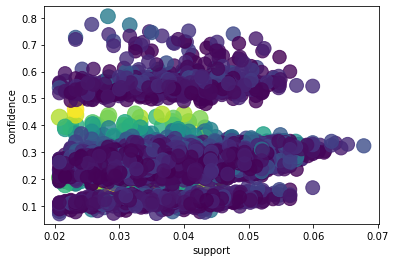

In [20]:
import random
import matplotlib.pyplot as plt
for i in range(len(support)):
    support[i] = support[i] + 0.0025 * (random.randint(1,10) - 5)
    confidence[i] = confidence[i] + 0.0025 * (random.randint(1,10) - 5)
plt.scatter(support, confidence, s= lift*100, alpha=0.8, c = lift)
plt.xlabel('support')
plt.ylabel('confidence')
plt.show()

In [24]:
#10 san pham duoc mua nhieu nhat
result = df.apply(pd.value_counts)
result

,all- purpose,aluminum foil,bagels,beef,butter,cereals,cheeses,coffee/tea,dinner rolls,dishwashing liquid/detergent,...,shampoo,soap,soda,spaghetti sauce,sugar,toilet paper,tortillas,vegetables,waffles,yogurt
False,712,701,700,712,720,688,694,707,696,697,...,719,707,694,714,728,708,718,297,690,701
True,427,438,439,427,419,451,445,432,443,442,...,420,432,445,425,411,431,421,842,449,438


In [22]:
df_true = result.iloc[1,:]
df_true[:10]

all- purpose                    427
aluminum foil                   438
bagels                          439
beef                            427
butter                          419
cereals                         451
cheeses                         445
coffee/tea                      432
dinner rolls                    443
dishwashing liquid/detergent    442
Name: True, dtype: int64

In [23]:
x = df_true.sort_values(ascending=False)

In [27]:
ten_product = x[:10]
ten_product

vegetables      842
poultry         480
ice cream       454
cereals         451
lunch meat      450
waffles         449
cheeses         445
soda            445
eggs            444
dinner rolls    443
Name: True, dtype: int64

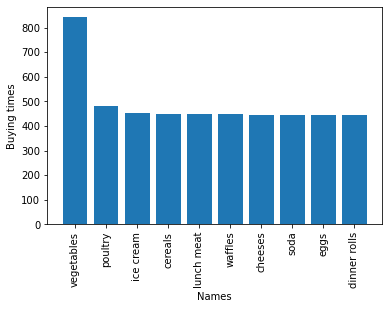

In [28]:
import matplotlib.pyplot as plt
plt.bar( ten_product.keys(),ten_product.values, align='center')
plt.xticks(rotation = 'vertical')
plt.ylabel("Buying times")
plt.xlabel("Names")
plt.show()